In [1]:
NEI <- readRDS("summarySCC_PM25.rds")
SCC <- readRDS("Source_Classification_Code.rds")

In [2]:
head(NEI)

,fips,SCC,Pollutant,Emissions,type,year
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
4,09001,10100401,PM25-PRI,15.714,POINT,1999
8,09001,10100404,PM25-PRI,234.178,POINT,1999
12,09001,10100501,PM25-PRI,0.128,POINT,1999
16,09001,10200401,PM25-PRI,2.036,POINT,1999
20,09001,10200504,PM25-PRI,0.388,POINT,1999
24,09001,10200602,PM25-PRI,1.490,POINT,1999


In [3]:
head(SCC)

,SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>
1,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulverized Coal,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NA,NA,,,
2,10100102,Point,Ext Comb /Electric Gen /Anthracite Coal /Traveling Grate (Overfeed) Stoker,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Traveling Grate (Overfeed) Stoker,NA,NA,,,
3,10100201,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulverized Coal: Wet Bottom,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Wet Bottom (Bituminous Coal),NA,NA,,,
4,10100202,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulverized Coal: Dry Bottom,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Dry Bottom (Bituminous Coal),NA,NA,,,
5,10100203,Point,Ext Comb /Electric Gen /Bituminous Coal /Cyclone Furnace,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Cyclone Furnace (Bituminous Coal),NA,NA,,,
6,10100204,Point,Ext Comb /Electric Gen /Bituminous Coal /Spreader Stoker,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Spreader Stoker (Bituminous Coal),NA,NA,,,


In [4]:
names(SCC)

[1] "SCC"                 "Data.Category"       "Short.Name"         
 [4] "EI.Sector"           "Option.Group"        "Option.Set"         
 [7] "SCC.Level.One"       "SCC.Level.Two"       "SCC.Level.Three"    
[10] "SCC.Level.Four"      "Map.To"              "Last.Inventory.Year"
[13] "Created_Date"        "Revised_Date"        "Usage.Notes"

In [9]:
length(names(SCC))

[1] 15

In [10]:
dim(NEI)
dim(SCC)

[1] 6497651       6

[1] 11717    15

In [11]:
str(NEI)

'data.frame':	6497651 obs. of  6 variables:
 $ fips     : chr  "09001" "09001" "09001" "09001" ...
 $ SCC      : chr  "10100401" "10100404" "10100501" "10200401" ...
 $ Pollutant: chr  "PM25-PRI" "PM25-PRI" "PM25-PRI" "PM25-PRI" ...
 $ Emissions: num  15.714 234.178 0.128 2.036 0.388 ...
 $ type     : chr  "POINT" "POINT" "POINT" "POINT" ...
 $ year     : int  1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 ...


In [12]:
str(SCC)

'data.frame':	11717 obs. of  15 variables:
 $ SCC                : Factor w/ 11717 levels "10100101","10100102",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Data.Category      : Factor w/ 6 levels "Biogenic","Event",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ Short.Name         : Factor w/ 11238 levels "","2,4-D Salts and Esters Prod /Process Vents, 2,4-D Recovery: Filtration",..: 3283 3284 3293 3291 3290 3294 3295 3296 3292 3289 ...
 $ EI.Sector          : Factor w/ 59 levels "Agriculture - Crops & Livestock Dust",..: 18 18 18 18 18 18 18 18 18 18 ...
 $ Option.Group       : Factor w/ 25 levels "","C/I Kerosene",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Option.Set         : Factor w/ 18 levels "","A","B","B1A",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ SCC.Level.One      : Factor w/ 17 levels "Brick Kilns",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ SCC.Level.Two      : Factor w/ 146 levels "","Agricultural Chemicals Production",..: 32 32 32 32 32 32 32 32 32 32 ...
 $ SCC.Level.Three    : Factor w/ 1061 levels "","100% Biosolids (e.g., sewage s

### Question 1
--------------------
Have total emissions from PM2.5 decreased in the United States from 1999 to 2008? 
Using the base plotting system, make a plot showing the total PM2.5 emission from all sources for each of the years 1999, 2002, 2005, and 2008.

In [17]:
aggregated <- aggregate(NEI$Emissions, by=list(year=NEI$year), FUN=sum)
aggregated

year,x
<int>,<dbl>
1999,7332967
2002,5635780
2005,5454703
2008,3464206


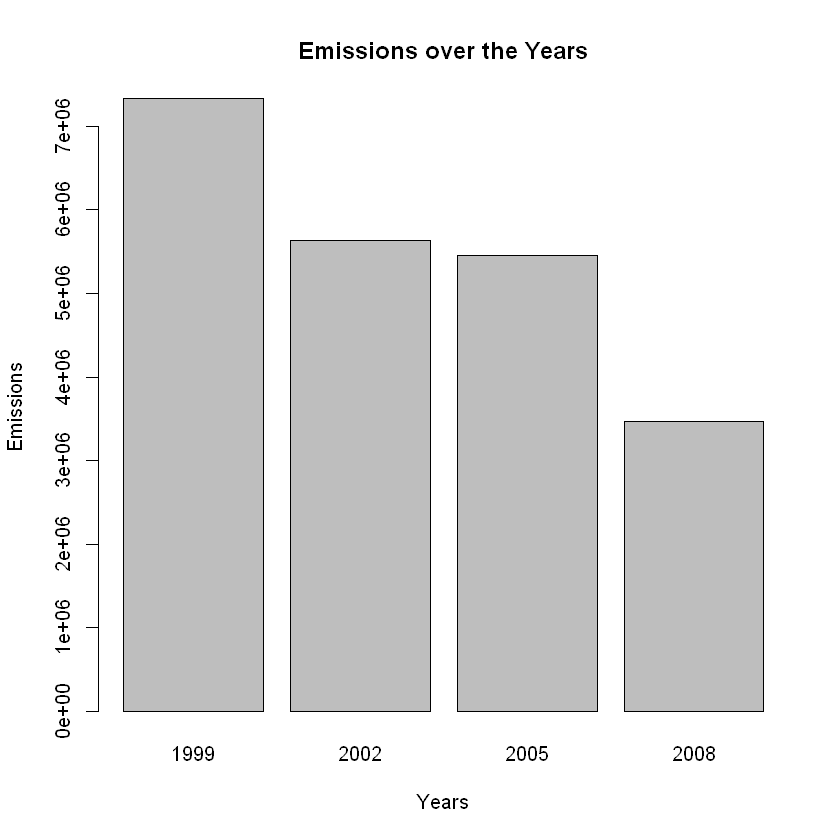

In [21]:
barplot(aggregated$x
        , names = aggregated$year
        , xlab = "Years", ylab = "Emissions"
        , main = "Emissions by Year")

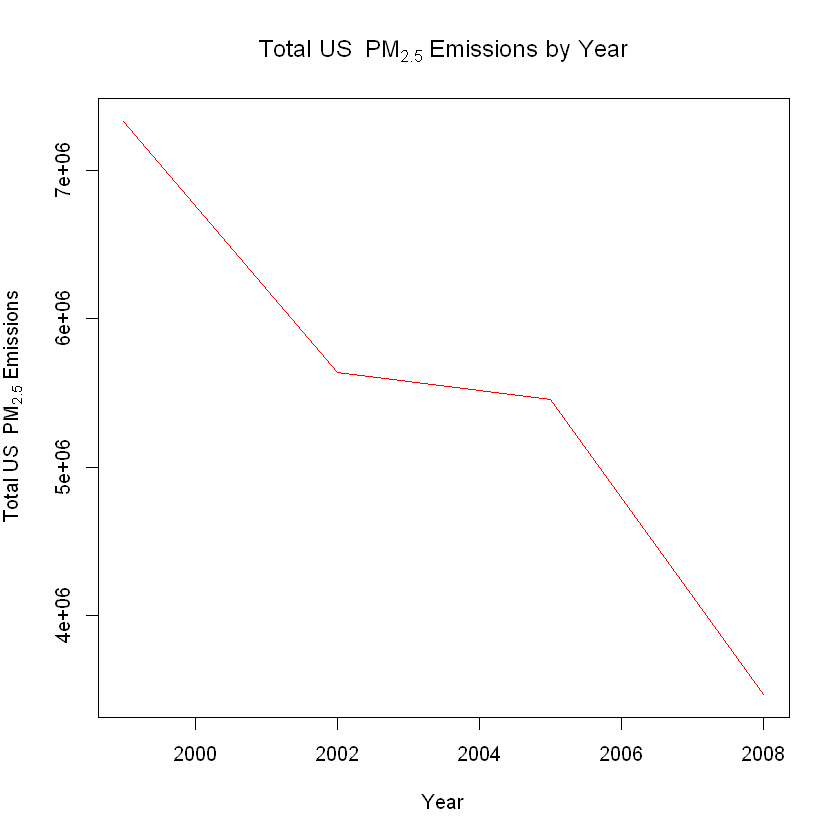

In [27]:
plot(aggregated$year, aggregated$x, type = "l", col = "red"
     , main = expression("Total US "~ PM[2.5]~ "Emissions by Year")
     , ylab = expression("Total US "~   PM[2.5] ~ "Emissions")
     , xlab = "Year")

In [28]:
png(filename='plot1.png')

plot(aggregated$year, aggregated$x, type = "l", col = "red"
     , main = expression("Total US "~ PM[2.5]~ "Emissions by Year")
     , ylab = expression("Total US "~   PM[2.5] ~ "Emissions")
     , xlab = "Year")

dev.off()

png 
  2

Have total emissions from PM2.5 decreased in the Baltimore City, Maryland (𝚏𝚒𝚙𝚜 == "𝟸𝟺𝟻𝟷𝟶") from 1999 to 2008? Use the base plotting system to make a plot answering this question.



In [29]:
?subset

In [31]:
head(NEI)

,fips,SCC,Pollutant,Emissions,type,year
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
4,09001,10100401,PM25-PRI,15.714,POINT,1999
8,09001,10100404,PM25-PRI,234.178,POINT,1999
12,09001,10100501,PM25-PRI,0.128,POINT,1999
16,09001,10200401,PM25-PRI,2.036,POINT,1999
20,09001,10200504,PM25-PRI,0.388,POINT,1999
24,09001,10200602,PM25-PRI,1.490,POINT,1999


In [38]:
forbaltimore <- subset(NEI , NEI$fips == "24510")

In [39]:
aggregated <- aggregate(forbaltimore$Emissions, by=list(year=forbaltimore$year), FUN=sum)
aggregated

year,x
<int>,<dbl>
1999,3274.180
2002,2453.916
2005,3091.354
2008,1862.282


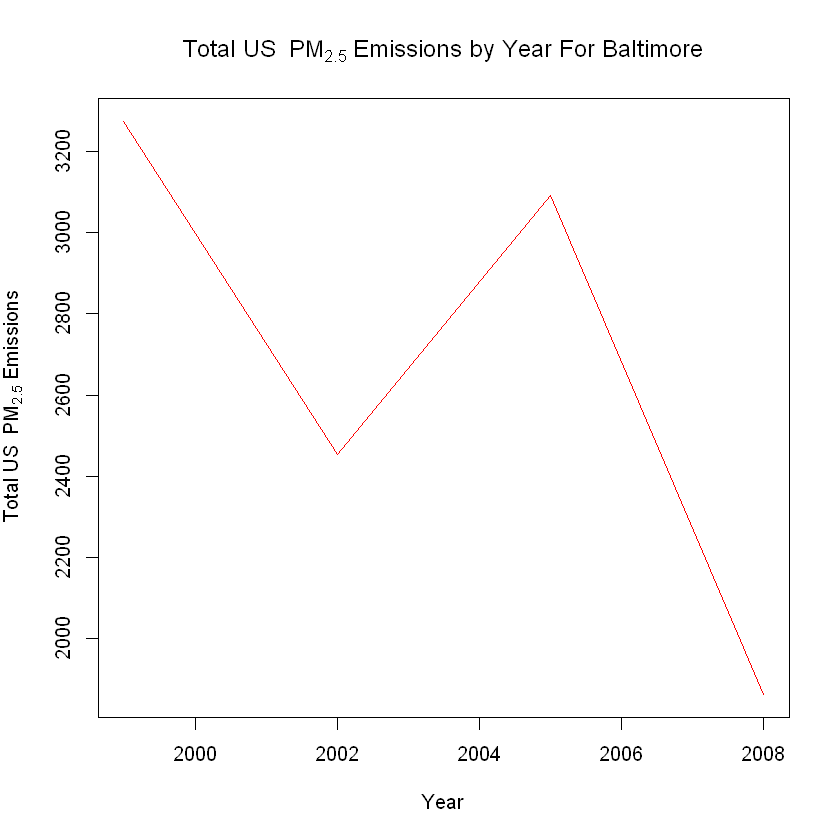

In [40]:
plot(aggregated$year, aggregated$x, type = "l", col = "red"
     , main = expression("Total US "~ PM[2.5]~ "Emissions by Year For Baltimore")
     , ylab = expression("Total US "~   PM[2.5] ~ "Emissions")
     , xlab = "Year")

In [41]:
png(filename='plot2.png')

plot(aggregated$year, aggregated$x, type = "l", col = "red"
     , main = expression("Total US "~ PM[2.5]~ "Emissions by Year")
     , ylab = expression("Total US "~   PM[2.5] ~ "Emissions")
     , xlab = "Year")

dev.off()

png 
  2

Of the four types of sources indicated by the 𝚝𝚢𝚙𝚎 (point, nonpoint, onroad, nonroad) variable, which of these four sources have seen decreases in emissions from 1999–2008 for Baltimore City? 
Which have seen increases in emissions from 1999–2008? Use the ggplot2 plotting system to make a plot answer this question.

In [42]:
head(NEI)

,fips,SCC,Pollutant,Emissions,type,year
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
4,09001,10100401,PM25-PRI,15.714,POINT,1999
8,09001,10100404,PM25-PRI,234.178,POINT,1999
12,09001,10100501,PM25-PRI,0.128,POINT,1999
16,09001,10200401,PM25-PRI,2.036,POINT,1999
20,09001,10200504,PM25-PRI,0.388,POINT,1999
24,09001,10200602,PM25-PRI,1.490,POINT,1999


In [43]:
head(SCC)

,SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>
1,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulverized Coal,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NA,NA,,,
2,10100102,Point,Ext Comb /Electric Gen /Anthracite Coal /Traveling Grate (Overfeed) Stoker,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Traveling Grate (Overfeed) Stoker,NA,NA,,,
3,10100201,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulverized Coal: Wet Bottom,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Wet Bottom (Bituminous Coal),NA,NA,,,
4,10100202,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulverized Coal: Dry Bottom,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Dry Bottom (Bituminous Coal),NA,NA,,,
5,10100203,Point,Ext Comb /Electric Gen /Bituminous Coal /Cyclone Furnace,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Cyclone Furnace (Bituminous Coal),NA,NA,,,
6,10100204,Point,Ext Comb /Electric Gen /Bituminous Coal /Spreader Stoker,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Spreader Stoker (Bituminous Coal),NA,NA,,,


In [45]:
forbaltimore <- subset(NEI , NEI$fips == "24510")
aggregated <- aggregate(forbaltimore$Emissions, by=list(year=forbaltimore$year , type=forbaltimore$type), FUN=sum)
aggregated

year,type,x
<int>,<chr>,<dbl>
1999,NON-ROAD,522.94000
2002,NON-ROAD,240.84692
2005,NON-ROAD,248.93369
2008,NON-ROAD,55.82356
1999,NONPOINT,2107.62500
2002,NONPOINT,1509.50000
2005,NONPOINT,1509.50000
2008,NONPOINT,1373.20731
1999,ON-ROAD,346.82000


In [52]:
library(ggplot2)

In [62]:
g <- ggplot(aggregated, aes(year, x , group= type)) 

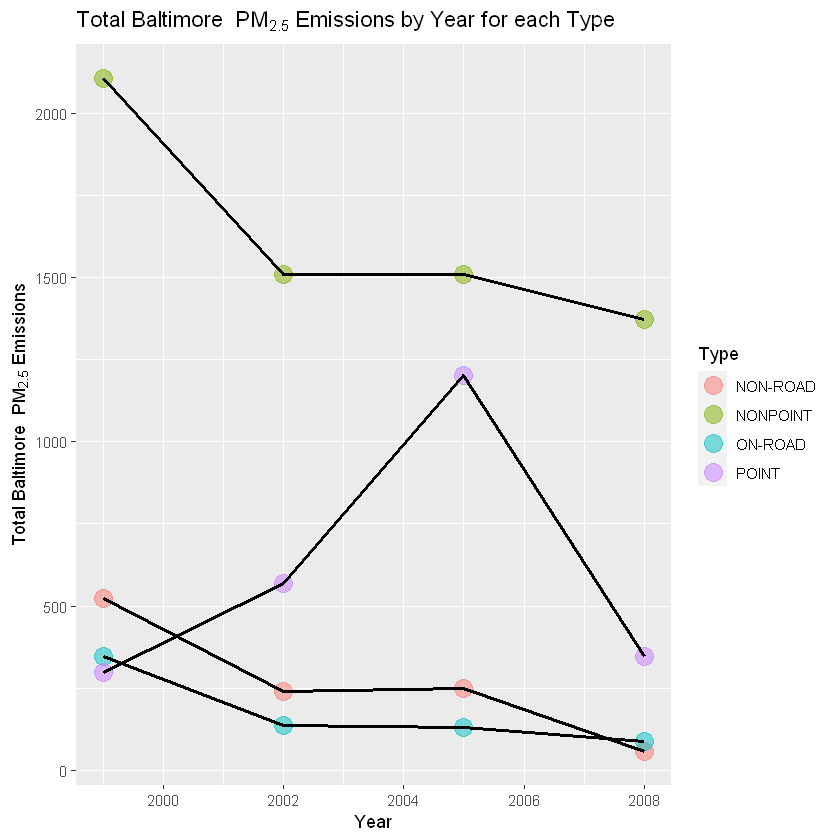

In [76]:
g + geom_point(aes(color = type), size = 5, alpha = 1/2) + geom_line( size = 1)+ 
    ggtitle(expression("Total Baltimore " ~ PM[2.5] ~ "Emissions by Year for each Type")) +
    ylab(expression("Total Baltimore " ~ PM[2.5] ~ "Emissions")) +
    xlab("Year") +
    scale_colour_discrete(name = "Type")

In [84]:
png(filename='plot3.png')

g + geom_point(aes(color = type), size = 5, alpha = 1/2) + geom_line( size = 1)+ 
    ggtitle(expression("Total Baltimore " ~ PM[2.5] ~ "Emissions by Year for each Type")) +
    ylab(expression("Total Baltimore " ~ PM[2.5] ~ "Emissions")) +
    xlab("Year") +
    scale_colour_discrete(name = "Type")
dev.off()

png 
  2

4. Across the United States, how have emissions from coal combustion-related sources changed from 1999-2008?



In [80]:
coalrows <- grepl("coal", SCC$Short.Name, ignore.case = T)
SCCcoal <- SCC[coalrows,]
NEIcoal <- subset(NEI , NEI$SCC %in% SCCcoal$SCC)
aggregated <- aggregate(NEIcoal$Emissions, by=list(year=NEIcoal$year , type=NEIcoal$type), FUN=sum)
aggregated

year,type,x
<int>,<chr>,<dbl>
1999,NONPOINT,18682.615
2002,NONPOINT,68364.623
2005,NONPOINT,68364.623
2008,NONPOINT,8229.776
1999,POINT,583941.487
2002,POINT,496575.374
2005,POINT,501290.084
2008,POINT,349854.078


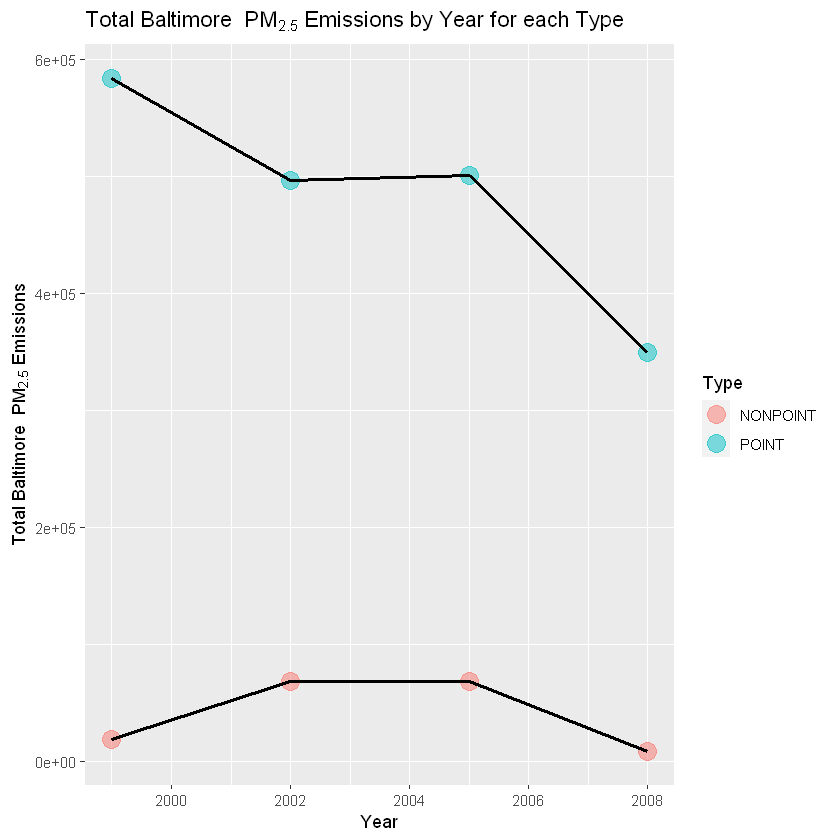

In [82]:
g <- ggplot(aggregated, aes(year, x , group= type)) 
g + geom_point(aes(color = type), size = 5, alpha = 1/2) + geom_line( size = 1)+ 
    ggtitle(expression("Total Baltimore " ~ PM[2.5] ~ "Emissions by Year for each Type")) +
    ylab(expression("Total Baltimore " ~ PM[2.5] ~ "Emissions")) +
    xlab("Year") +
    scale_colour_discrete(name = "Type")

In [85]:
png(filename='plot4.png')
g <- ggplot(aggregated, aes(year, x , group= type)) 
g + geom_point(aes(color = type), size = 5, alpha = 1/2) + geom_line( size = 1)+ 
    ggtitle(expression("Total Baltimore " ~ PM[2.5] ~ "Emissions by Year for each Type")) +
    ylab(expression("Total Baltimore " ~ PM[2.5] ~ "Emissions")) +
    xlab("Year") +
    scale_colour_discrete(name = "Type")
dev.off()

png 
  2

5. How have emissions from motor vehicle sources changed from 1999-2008 in Baltimore City?

In [86]:
baltimoreMotor <- subset(NEI, NEI$fips == "24510" & NEI$type == "ON-ROAD")

In [87]:
aggregated <- aggregate(baltimoreMotor$Emissions, by=list(year=baltimoreMotor$year), FUN=sum)
aggregated

year,x
<int>,<dbl>
1999,346.82000
2002,134.30882
2005,130.43038
2008,88.27546


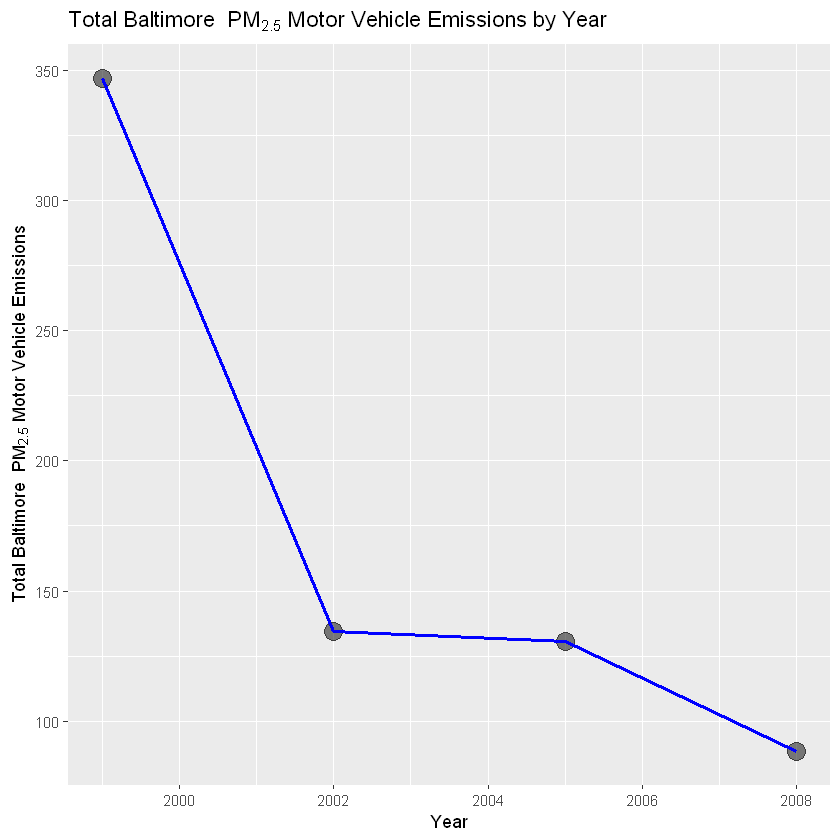

In [92]:
g <- ggplot(aggregated, aes(year, x)) 
g + geom_point(size = 5, alpha = 1/2) + geom_line( size = 1 , color = 'blue')+ 
    ggtitle(expression("Total Baltimore " ~ PM[2.5] ~ "Motor Vehicle Emissions by Year")) +
    ylab(expression("Total Baltimore " ~ PM[2.5] ~ "Motor Vehicle Emissions")) +
    xlab("Year")

In [93]:
png(filename='plot5.png')
g <- ggplot(aggregated, aes(year, x)) 
g + geom_point(size = 5, alpha = 1/2) + geom_line( size = 1 , color = 'blue')+ 
    ggtitle(expression("Total Baltimore " ~ PM[2.5] ~ "Motor Vehicle Emissions by Year")) +
    ylab(expression("Total Baltimore " ~ PM[2.5] ~ "Motor Vehicle Emissions")) +
    xlab("Year")
dev.off()

png 
  2

6. Compare emissions from motor vehicle sources in Baltimore City with emissions from motor vehicle sources in Los Angeles County, California (fips == “06037”). Which city has seen greater changes over time in motor vehicle emissions?

In [96]:
twociteis <- subset(NEI, NEI$fips %in% c("24510","06037") & NEI$type == "ON-ROAD")
twociteis

,fips,SCC,Pollutant,Emissions,type,year
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
114470,24510,220100123B,PM25-PRI,7.38,ON-ROAD,1999
114472,24510,220100123T,PM25-PRI,2.78,ON-ROAD,1999
114477,24510,220100123X,PM25-PRI,11.76,ON-ROAD,1999
114479,24510,220100125B,PM25-PRI,3.50,ON-ROAD,1999
114481,24510,220100125T,PM25-PRI,1.32,ON-ROAD,1999
114486,24510,220100125X,PM25-PRI,5.58,ON-ROAD,1999
114488,24510,220100127B,PM25-PRI,4.43,ON-ROAD,1999
114490,24510,220100127T,PM25-PRI,1.67,ON-ROAD,1999
114495,24510,220100127X,PM25-PRI,8.41,ON-ROAD,1999


In [98]:
aggregated <- aggregate(twociteis$Emissions, by=list(year=twociteis$year ,city=twociteis$fips), FUN=sum)
aggregated

year,city,x
<int>,<chr>,<dbl>
1999,06037,3931.12000
2002,06037,4273.71020
2005,06037,4601.41493
2008,06037,4101.32100
1999,24510,346.82000
2002,24510,134.30882
2005,24510,130.43038
2008,24510,88.27546


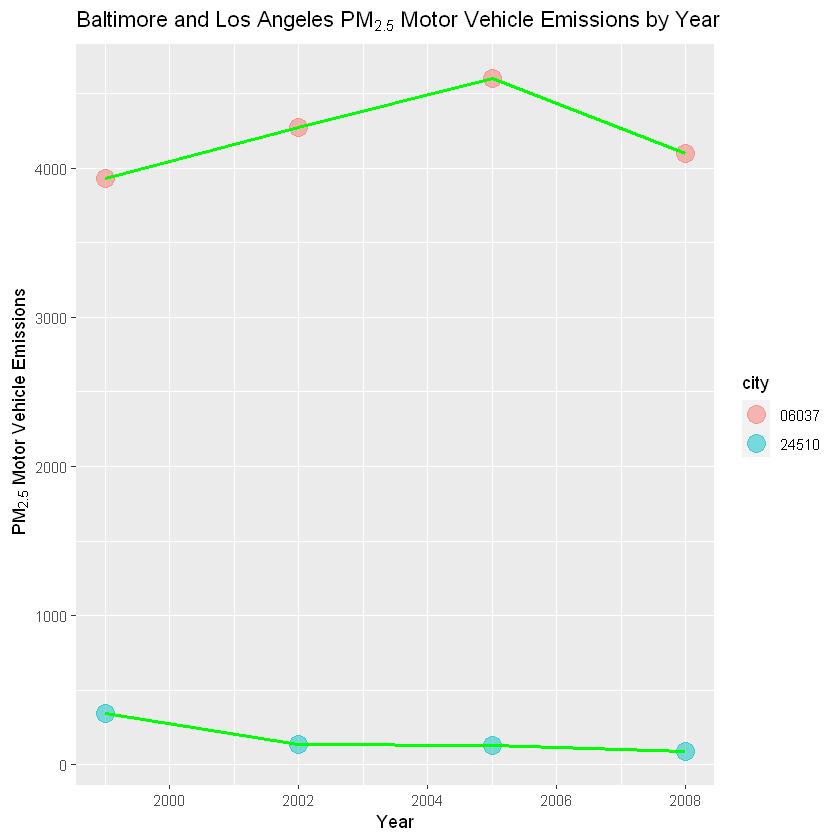

In [100]:
g <- ggplot(aggregated, aes(year, x , group= city)) 
g + geom_point(aes(color = city), size = 5, alpha = 1/2) + geom_line( size = 1, color = 'green')+ 
    ggtitle(expression("Baltimore and Los Angeles" ~ PM[2.5] ~ "Motor Vehicle Emissions by Year")) +
    ylab(expression(~PM[2.5]~ "Motor Vehicle Emissions")) +
    xlab("Year")

In [102]:
aggregated1 <- aggregate(NEI$Emissions, by=list(year=NEI$year), FUN=sum)
aggregated1

png(filename='plot1.png')

plot(aggregated1$year, aggregated1$x, type = "l", col = "red"
     , main = expression("Total US "~ PM[2.5]~ "Emissions by Year")
     , ylab = expression("Total US "~   PM[2.5] ~ "Emissions")
     , xlab = "Year")

dev.off()

year,x
<int>,<dbl>
1999,7332967
2002,5635780
2005,5454703
2008,3464206


png 
  2

In [104]:
forbaltimore <- subset(NEI , NEI$fips == "24510")

aggregated2 <- aggregate(forbaltimore$Emissions, by=list(year=forbaltimore$year), FUN=sum)
aggregated2

png(filename='plot2.png')
plot(aggregated2$year, aggregated2$x, type = "l", col = "red"
     , main = expression("Total Baltimore" ~ PM[2.5] ~ "Emissions by Year")
     , ylab = expression("Total Baltimore  "~   PM[2.5] ~ "Emissions")
     , xlab = "Year")

dev.off()

year,x
<int>,<dbl>
1999,3274.180
2002,2453.916
2005,3091.354
2008,1862.282


png 
  2

In [105]:
Baltimore <- subset(NEI , NEI$fips == "24510")
aggregated3 <- aggregate(forbaltimore$Emissions, by=list(year=forbaltimore$year , type=forbaltimore$type), FUN=sum)
aggregated3

library(ggplot2)

g <- ggplot(aggregated3, aes(year, x , group= type)) 

png(filename='plot3.png')

g + geom_point(aes(color = type), size = 5, alpha = 1/2) + geom_line( size = 1)+ 
    ggtitle(expression("Total Baltimore " ~ PM[2.5] ~ "Emissions by Year for each Type")) +
    ylab(expression("Total Baltimore " ~ PM[2.5] ~ "Emissions")) +
    xlab("Year")
dev.off()

year,type,x
<int>,<chr>,<dbl>
1999,NON-ROAD,522.94000
2002,NON-ROAD,240.84692
2005,NON-ROAD,248.93369
2008,NON-ROAD,55.82356
1999,NONPOINT,2107.62500
2002,NONPOINT,1509.50000
2005,NONPOINT,1509.50000
2008,NONPOINT,1373.20731
1999,ON-ROAD,346.82000


png 
  2

In [106]:
library(ggplot2)
coalrows <- grepl("coal", SCC$Short.Name, ignore.case = T)
SCCcoal <- SCC[coalrows,]
NEIcoal <- subset(NEI , NEI$SCC %in% SCCcoal$SCC)
aggregated4 <- aggregate(NEIcoal$Emissions, by=list(year=NEIcoal$year , type=NEIcoal$type), FUN=sum)
aggregated4


png(filename='plot4.png')

g <- ggplot(aggregated4, aes(year, x , group= type)) 
g + geom_point(aes(color = type), size = 5, alpha = 1/2) + geom_line( size = 1)+ 
    ggtitle(expression("Total US " ~ PM[2.5] ~ "Coal Emission by Year for each Type")) +
    ylab(expression("Total US " ~ PM[2.5] ~ "Coal Emission")) +
    xlab("Year")

dev.off()

year,type,x
<int>,<chr>,<dbl>
1999,NONPOINT,18682.615
2002,NONPOINT,68364.623
2005,NONPOINT,68364.623
2008,NONPOINT,8229.776
1999,POINT,583941.487
2002,POINT,496575.374
2005,POINT,501290.084
2008,POINT,349854.078


png 
  2

In [107]:
baltimoreMotor <- subset(NEI, NEI$fips == "24510" & NEI$type == "ON-ROAD")

aggregated5 <- aggregate(baltimoreMotor$Emissions, by=list(year=baltimoreMotor$year), FUN=sum)
aggregated5

png(filename='plot5.png')
g <- ggplot(aggregated5, aes(year, x)) 
g + geom_point(size = 5, alpha = 1/2) + geom_line( size = 1 , color = 'blue')+ 
    ggtitle(expression("Total Baltimore " ~ PM[2.5] ~ "Motor Vehicle Emissions by Year")) +
    ylab(expression("Total Baltimore " ~ PM[2.5] ~ "Motor Vehicle Emissions")) +
    xlab("Year")
dev.off()

year,x
<int>,<dbl>
1999,346.82000
2002,134.30882
2005,130.43038
2008,88.27546


png 
  2

In [108]:
library(ggplot2)
twociteis <- subset(NEI, NEI$fips %in% c("24510","06037") & NEI$type == "ON-ROAD")
twociteis

aggregated6 <- aggregate(twociteis$Emissions, by=list(year=twociteis$year ,city=twociteis$fips), FUN=sum)
aggregated6

png(filename='plot6.png')
g <- ggplot(aggregated6, aes(year, x , group= city)) 
g + geom_point(aes(color = city), size = 5, alpha = 1/2) + geom_line( size = 1, color = 'green')+ 
    ggtitle(expression("Baltimore and Los Angeles" ~ PM[2.5] ~ "Motor Vehicle Emissions by Year")) +
    ylab(expression("Total"~PM[2.5]~ "Motor Vehicle Emissions")) +
    xlab("Year")
dev.off()

,fips,SCC,Pollutant,Emissions,type,year
,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>
114470,24510,220100123B,PM25-PRI,7.38,ON-ROAD,1999
114472,24510,220100123T,PM25-PRI,2.78,ON-ROAD,1999
114477,24510,220100123X,PM25-PRI,11.76,ON-ROAD,1999
114479,24510,220100125B,PM25-PRI,3.50,ON-ROAD,1999
114481,24510,220100125T,PM25-PRI,1.32,ON-ROAD,1999
114486,24510,220100125X,PM25-PRI,5.58,ON-ROAD,1999
114488,24510,220100127B,PM25-PRI,4.43,ON-ROAD,1999
114490,24510,220100127T,PM25-PRI,1.67,ON-ROAD,1999
114495,24510,220100127X,PM25-PRI,8.41,ON-ROAD,1999


year,city,x
<int>,<chr>,<dbl>
1999,06037,3931.12000
2002,06037,4273.71020
2005,06037,4601.41493
2008,06037,4101.32100
1999,24510,346.82000
2002,24510,134.30882
2005,24510,130.43038
2008,24510,88.27546


png 
  2